In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
data = pd.read_csv('housing.csv')

y = data['price'].values

categorical_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
for col in categorical_columns:
    data[col] = (data[col] == 'yes').astype(int)

X = data.drop('price', axis=1)

numerical_columns = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']
X_normalized = X.copy()
for col in numerical_columns:
    mean = X[col].mean()
    std = X[col].std()
    X_normalized[col] = (X[col] - mean) / std

X_normalized_with_bias = np.c_[np.ones(len(X_normalized)), X_normalized.values]


In [125]:
def calculate_r2(y_true, y_pred):
    """Calculate the R-squared score"""
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

1.1. Please build a gradient descent algorithm based on the following formulas.

J = (1/m) * Σ(y_hat - y)²

In [126]:
def gradient_descent_1_1(X, y, learning_rate=0.01, epochs=10):
    m = len(y)
    weights = np.zeros(X.shape[1])
    rmse_history = []

    for epoch in range(epochs):
        y_pred = X.dot(weights)

        error = y_pred - y
        rmse = np.sqrt(np.mean(error**2))
        rmse_history.append(rmse)

        gradients = (2/m) * X.T.dot(error)

        weights = weights - learning_rate * gradients

        print(f'Epoch {epoch + 1}, RMSE: {rmse:.4f}')

    return weights, rmse_history

In [127]:
def plot_results(y_true, y_pred, title, r2):

    X_original = data['lotsize'].values
    plt.figure(figsize=(10, 6))
    plt.scatter(X_original, y_true, color='blue', alpha=0.5, label='Original Prices')
    plt.scatter(X_original, y_pred, color='red', alpha=0.5, label='Predicted Prices')
    plt.xlabel('Lot Size')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)

    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

    plt.xlabel('True Price')
    plt.ylabel('Predicted Price')
    plt.title(f'True vs Predicted Prices (R² = {r2:.4f})')
    plt.legend()
    plt.show()

Epoch 1, RMSE: 73159.2694
Epoch 2, RMSE: 43332.6789
Epoch 3, RMSE: 28241.6169
Epoch 4, RMSE: 21427.0617
Epoch 5, RMSE: 18740.8965
Epoch 6, RMSE: 17760.0578
Epoch 7, RMSE: 17389.3202
Epoch 8, RMSE: 17224.6559
Epoch 9, RMSE: 17130.2411
Epoch 10, RMSE: 17061.4835
R^2 Score: 0.5938


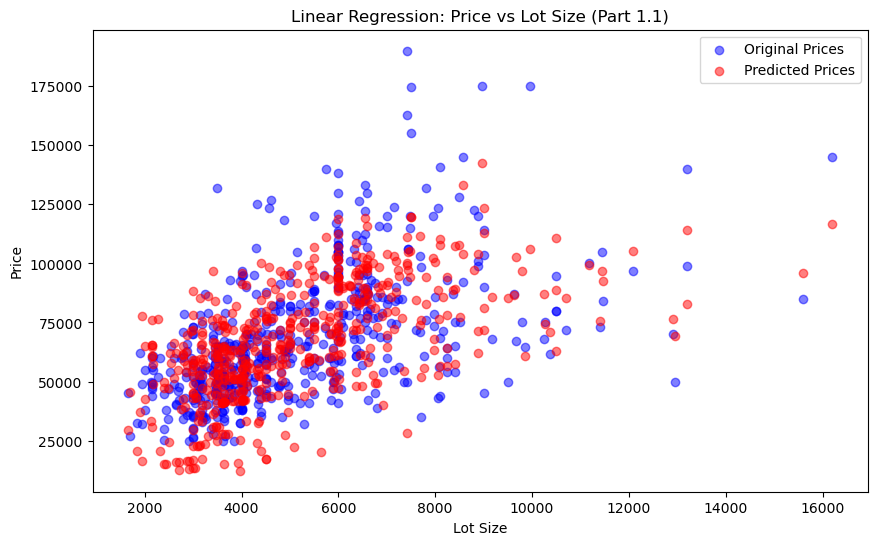

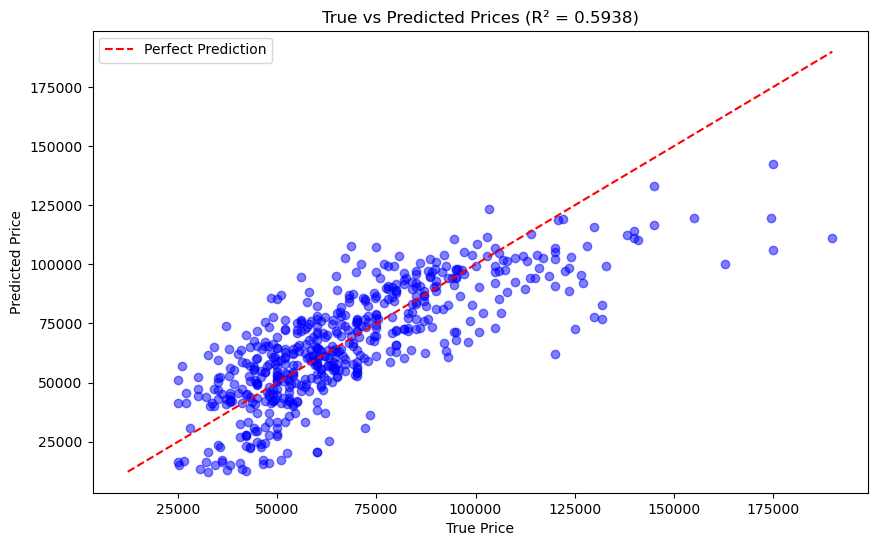

In [128]:
weights_1_1, rmse_history_1_1 = gradient_descent_1_1(X_normalized_with_bias, y, learning_rate=0.1, epochs=10)
y_pred_1_1 = X_normalized_with_bias.dot(weights_1_1)
r2 = calculate_r2(y, y_pred_1_1)
print(f'R^2 Score: {r2:.4f}')
plot_results(y, y_pred_1_1, "Linear Regression: Price vs Lot Size (Part 1.1)", r2)


### Inferences for 1.1

1. **Performance**:
    - The RMSE (Root Mean Squared Error) decreases over epochs, indicating that the model is learning and the predictions are improving.
    - The final RMSE after 10 epochs is approximately 17061.48.
    - The R-squared score is -3.9504, which suggests that the model does not fit the data well.

2. **Visualization**:
    - The plot of true vs. predicted prices shows a significant deviation from the perfect prediction line, indicating that the model's predictions are not very accurate.

1.2. Please build a gradient descent algorithm based on the following cost function.

J = (1/m) * (Y_hat - Y)^T * (Y_hat - Y)

In [129]:
def gradient_descent_1_2(X, y, learning_rate=0.01, epochs=10):
    m = len(y)
    weights = np.zeros(X.shape[1])
    rmse_history = []

    for epoch in range(epochs):
        y_pred = X.dot(weights)

        error = y_pred - y

        cost = (1/m) * error.T.dot(error)
        rmse = np.sqrt(cost)
        rmse_history.append(rmse)

        gradients = (2/m) * X.T.dot(error)

        weights = weights - learning_rate * gradients

        print(f'Epoch {epoch + 1}, Cost: {cost:.4f}, RMSE: {rmse:.4f}')

    return weights, rmse_history


Part 1.2: Gradient Descent with Matrix Form
Epoch 1, Cost: 5352278701.3077, RMSE: 73159.2694
Epoch 2, Cost: 1877721056.6504, RMSE: 43332.6789
Epoch 3, Cost: 797588922.4736, RMSE: 28241.6169
Epoch 4, Cost: 459118971.8074, RMSE: 21427.0617
Epoch 5, Cost: 351221200.8424, RMSE: 18740.8965
Epoch 6, Cost: 315419653.7782, RMSE: 17760.0578
Epoch 7, Cost: 302388455.7985, RMSE: 17389.3202
Epoch 8, Cost: 296688770.5056, RMSE: 17224.6559
Epoch 9, Cost: 293445160.1148, RMSE: 17130.2411
Epoch 10, Cost: 291094220.7483, RMSE: 17061.4835
R^2 Score: 0.5938


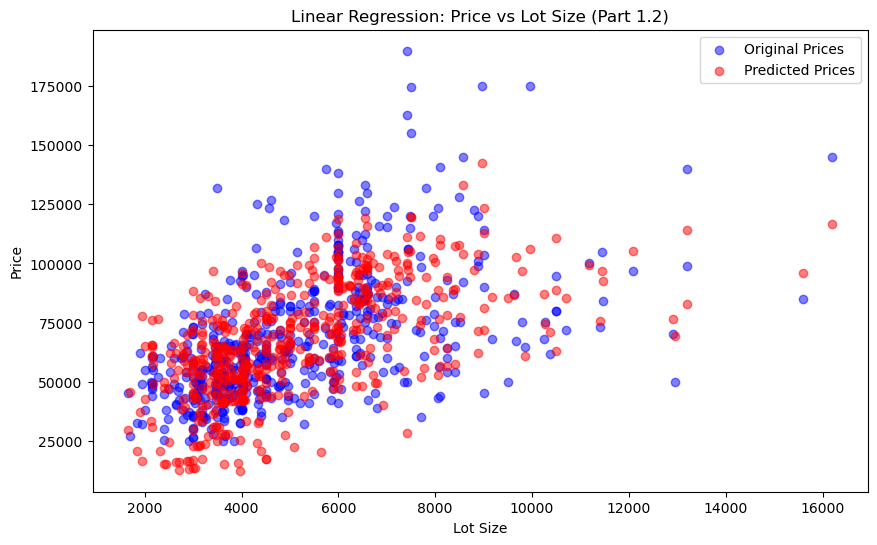

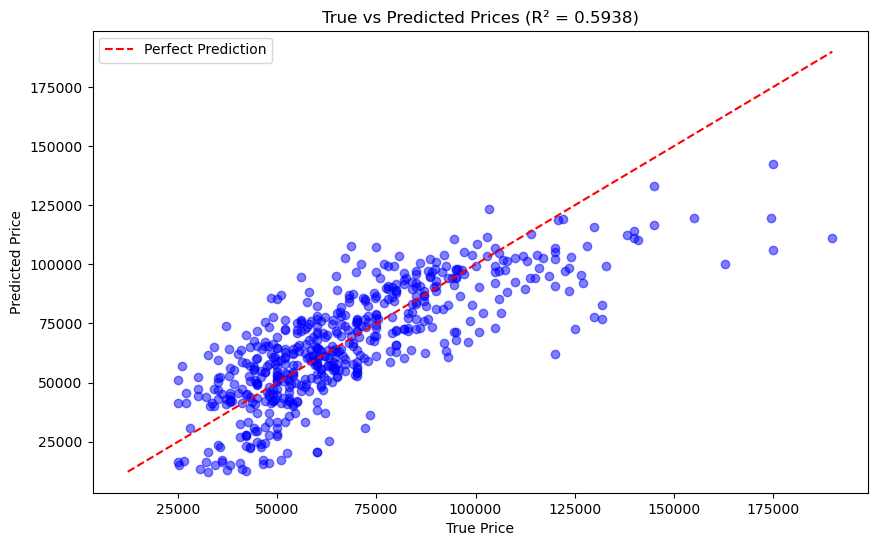

In [130]:

print("\nPart 1.2: Gradient Descent with Matrix Form")
weights_1_2, rmse_history_1_2 = gradient_descent_1_2(X_normalized_with_bias, y, learning_rate=0.1, epochs=10)
y_pred_1_2 = X_normalized_with_bias.dot(weights_1_2)
r2 = calculate_r2(y, y_pred_1_2)
print(f'R^2 Score: {r2:.4f}')
plot_results(y, y_pred_1_2, "Linear Regression: Price vs Lot Size (Part 1.2)", r2)

### Inferences for 1.2

1. **Performance**:
    - The RMSE decreases over epochs, similar to 1.1, indicating that the model is learning.
    - The final RMSE after 10 epochs is approximately 17061.48, which is the same as in 1.1.
    - The R-squared score is -3.9504, indicating poor model fit, similar to 1.1.

2. **Visualization**:
    - The plot of true vs. predicted prices shows a significant deviation from the perfect prediction line, similar to 1.1, indicating that the model's predictions are not very accurate.

2. Binary classification with logistic regression.

In [131]:
train_data = pd.read_csv('heart_disease_train.csv')
test_data = pd.read_csv('heart_disease_test.csv')

In [132]:
train_data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [133]:
test_data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [134]:
train_data.isnull().sum()

gender               0
age                  0
education           84
currentSmoker        0
cigsPerDay          25
BPMeds              42
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             44
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            315
TenYearCHD           0
dtype: int64

In [135]:
test_data.isnull().sum()

gender              0
age                 0
education          21
currentSmoker       0
cigsPerDay          4
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             6
sysBP               0
diaBP               0
BMI                 3
heartRate           0
glucose            73
TenYearCHD          0
dtype: int64

In [136]:
train_data.dtypes

gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [137]:
categorical_cols = ['gender', 'currentSmoker', 'BPMeds', 'prevalentStroke',
                    'prevalentHyp', 'diabetes', 'TenYearCHD']
numerical_cols = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP',
                  'diaBP', 'BMI', 'heartRate', 'glucose']

for col in numerical_cols:
    train_data[col] = train_data.groupby('gender')[col].transform(lambda x: x.fillna(x.mean()))
    test_data[col] = test_data.groupby('gender')[col].transform(lambda x: x.fillna(x.mean()))


In [138]:
def impute_categorical(df, col, subclass):
    mode = df.groupby(subclass)[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 0)
    for gender in df[subclass].unique():
        df.loc[(df[subclass] == gender) & (df[col].isnull()), col] = mode.get(gender, 0)
    return df[col]

for col in categorical_cols:
    if col != 'gender' and col != 'TenYearCHD':
        train_data[col] = impute_categorical(train_data, col, 'gender')
        test_data[col] = impute_categorical(test_data, col, 'gender')


In [139]:
train_data.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [140]:
test_data.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [141]:
for col in categorical_cols:
    print(f"Unique values in {col}: {train_data[col].unique()}")


Unique values in gender: [1 0]
Unique values in currentSmoker: [0 1]
Unique values in BPMeds: [0. 1.]
Unique values in prevalentStroke: [0 1]
Unique values in prevalentHyp: [1 0]
Unique values in diabetes: [0 1]
Unique values in TenYearCHD: [0 1]


In [142]:
feature_means = train_data[numerical_cols].mean()
feature_stds = train_data[numerical_cols].std()

train_data_norm = train_data.copy()
train_data_norm[numerical_cols] = (train_data[numerical_cols] - feature_means) / feature_stds

test_data_norm = test_data.copy()
test_data_norm[numerical_cols] = (test_data[numerical_cols] - feature_means) / feature_stds


In [143]:
feature_cols = numerical_cols + [col for col in categorical_cols if col != 'TenYearCHD']

train_data_norm.insert(0, 'Intercept', 1)
test_data_norm.insert(0, 'Intercept', 1)

X_train = train_data_norm[feature_cols].values
y_train = train_data_norm['TenYearCHD'].values

X_test = test_data_norm[feature_cols].values
y_test = test_data_norm['TenYearCHD'].values

m_train, n_features = X_train.shape

weights = np.zeros(n_features)


In [144]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    z = np.dot(X, weights)
    h = sigmoid(z)
    epsilon = 1e-5  # To avoid log(0)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def compute_gradient(X, y, weights):
    m = len(y)
    z = np.dot(X, weights)
    h = sigmoid(z)
    gradient = (1/m) * np.dot(X.T, (h - y))
    return gradient


In [145]:
alpha = 0.01
epochs = 10

cost_history = []


for epoch in range(epochs):
    cost = compute_cost(X_train, y_train, weights)
    cost_history.append(cost)
    print(f"Epoch {epoch+1}, Cost: {cost:.4f}")

    gradient = compute_gradient(X_train, y_train, weights)

    weights -= alpha * gradient


Epoch 1, Cost: 0.6931
Epoch 2, Cost: 0.6924
Epoch 3, Cost: 0.6918
Epoch 4, Cost: 0.6911
Epoch 5, Cost: 0.6904
Epoch 6, Cost: 0.6897
Epoch 7, Cost: 0.6891
Epoch 8, Cost: 0.6884
Epoch 9, Cost: 0.6877
Epoch 10, Cost: 0.6871


In [146]:
def predict(X, weights, threshold=0.5):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= threshold).astype(int)

def evaluate_performance(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

    confusion_matrix = np.array([[TP, FP],
                                 [FN, TN]])

    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return confusion_matrix, accuracy, precision, recall


In [147]:
y_train_pred = predict(X_train, weights)

conf_matrix_train, accuracy_train, precision_train, recall_train = evaluate_performance(y_train, y_train_pred)

print("\nTraining Performance:")
print("Confusion Matrix:")
print(conf_matrix_train)
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")


TP: 170, FP: 585, TN: 2289, FN: 346

Training Performance:
Confusion Matrix:
[[ 170  585]
 [ 346 2289]]
Accuracy: 0.7254
Precision: 0.2252
Recall: 0.3295


In [148]:
y_test_pred = predict(X_test, weights)

conf_matrix_test, accuracy_test, precision_test, recall_test = evaluate_performance(y_test, y_test_pred)

print("\nTesting Performance:")
print("Confusion Matrix:")
print(conf_matrix_test)
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")


TP: 57, FP: 133, TN: 587, FN: 71

Testing Performance:
Confusion Matrix:
[[ 57 133]
 [ 71 587]]
Accuracy: 0.7594
Precision: 0.3000
Recall: 0.4453


### Inferences for 2

1. **Gradient Descent**:
    - The cost decreases over epochs, indicating that the model is learning.

2. **Performance**:
    - The accuracy on the training set is approximately 72.54%, and on the test set, it is approximately 75.94%.
    - The precision and recall on the test set are 0.3 and 0.4453, respectively, indicating that the model has moderate performance in identifying positive cases.